## Observations and Insights 

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata.head()
study_results.head()

# Combine the data into a single dataset
study_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [18]:
# Checking the number of mice.
study_data["Mouse ID"].count()
# Checking how many rows of data records
study_data.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [19]:
# Checking how many unique mice
mice_qty = study_data.loc[:, "Mouse ID"].value_counts().count()
mice_qty

249

In [20]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df = study_data.groupby(["Mouse ID", "Timepoint"]).count()
duplicate_ID = df.loc[df.loc[:, "Drug Regimen"] > 1, :].index[0][0]
duplicate_ID

'g989'

In [21]:
# Optional: Get all the data for the duplicate mouse ID. 
study_data[study_data["Mouse ID"] == duplicate_ID]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [22]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = study_data.loc[study_data.loc[:,"Mouse ID"] != duplicate_ID, :]
clean_data.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

In [23]:
# Checking the number of mice in the clean DataFrame.
clean_data.loc[:, "Mouse ID"].value_counts().count()

248

## Message
- Remove all Mouse ID g989 data

## Summary Statistics

### Using pandas statistics methods
- Padas var() method ddof default 1
- While Numpy var() method ddof default 0
- So the result is different

In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for 
# each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tumor_vol_by_regimen = clean_data[["Drug Regimen", "Tumor Volume (mm3)"]].groupby(["Drug Regimen"])
tumor_vol_by_regimen.mean()
tumor_vol_by_regimen.median()
tumor_vol_by_regimen.std()
tumor_vol_by_regimen.var()
tumor_vol_by_regimen.sem()


pd.concat(
    [
        tumor_vol_by_regimen.mean().rename(columns={"Tumor Volume (mm3)": "Tumor Vol Mean"}),
        tumor_vol_by_regimen.median().rename(columns={"Tumor Volume (mm3)": "Tumor Vol Median"}),
        tumor_vol_by_regimen.var(ddof=0).rename(columns={"Tumor Volume (mm3)": "Tumor Vol Variance"}),
        tumor_vol_by_regimen.std().rename(columns={"Tumor Volume (mm3)": "Tumor Vol Std Deviation"}),
        tumor_vol_by_regimen.sem().rename(columns={"Tumor Volume (mm3)": "Tumor Vol SEM"})
    ],
    axis=1
)

,Tumor Vol Mean,Tumor Vol Median,Tumor Vol Variance,Tumor Vol Std Deviation,Tumor Vol SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.069446,6.268188,0.469821
Infubinol,52.884795,51.820584,42.886388,6.567243,0.492236
Ketapril,55.235638,53.698743,68.188930,8.279709,0.603860
Naftisol,54.331565,52.509285,65.817708,8.134708,0.596466
Placebo,54.033581,52.288934,60.830138,7.821003,0.581331
Propriva,52.320930,50.446266,43.555716,6.622085,0.544332
Ramicane,40.216745,40.673236,23.383692,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.122106,7.710419,0.573111


### Using numpy and scipy methods

In [25]:
sts_summary = {
    "mean":{},
    "median": {},
    "variance": {},
    "standard deviation": {},
    "SEM": {},
}
for drug in clean_data["Drug Regimen"].unique():
    tumor_vol_by_drug = clean_data[clean_data["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    sts_summary["SEM"][drug] = st.sem(tumor_vol_by_drug)
    sts_summary["variance"][drug] = np.var(tumor_vol_by_drug)
    sts_summary["standard deviation"][drug] = np.std(tumor_vol_by_drug)
    sts_summary["mean"][drug]=np.mean(tumor_vol_by_drug)
    sts_summary["median"][drug]=np.median(tumor_vol_by_drug)
sts_summary

pd.DataFrame(sts_summary).sort_index()

,mean,median,variance,standard deviation,SEM
Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821
Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466
Placebo,54.033581,52.288934,60.830138,7.799368,0.581331
Propriva,52.320930,50.446266,43.555716,6.599675,0.544332
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111
Zoniferol,53.236507,51.818479,48.266689,6.947423,0.516398


### Statistics Methods  pandas vs. numpy and scipy
| | pandas | numpy and scipy |
| :---: | :--- | :--- |
| mean | same result | same result |
| medium | same result | same result |
| variance | different result since ddof default value is 1 | different result since ddof default value is 0 |
| standard deviation | same result | same result |
| SEM | same result | same result |



## Bar and Pie Charts
### The pandas plot has a liittle bit different in style from matplotlib plot style when the plot setup is the same.
- Pandas bar plot:
    - bar is thinner 
    - The distance between each bar is bigger
- Matplotlib bar plot:
    - bar is wider
    - The distance between each bar is smaller

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

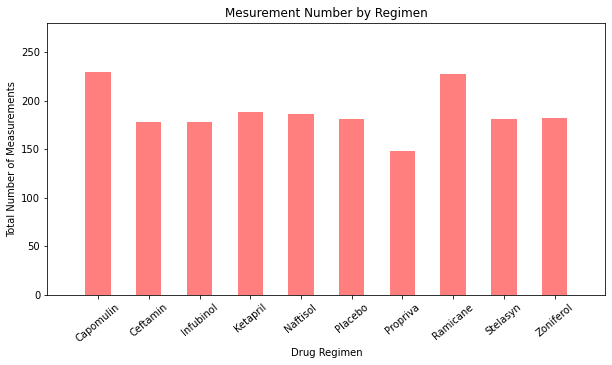

In [26]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
clean_data.groupby(["Drug Regimen"]).count()["Mouse ID"].plot(kind="bar", color="r", alpha=0.5, figsize=(10,5))
plt.ylabel("Total Number of Measurements")
plt.xlim(left=-1, right=10)
plt.ylim(0, 280)
plt.title("Mesurement Number by Regimen")
plt.xticks(rotation="40")

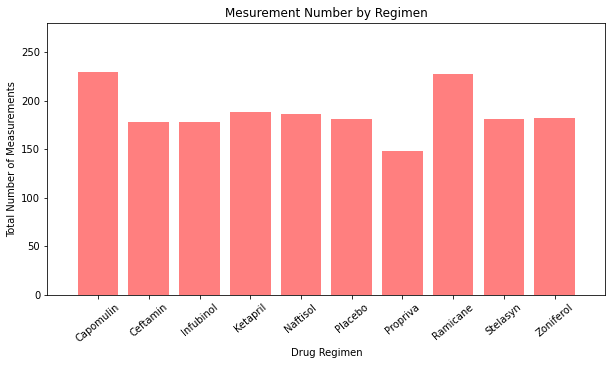

In [27]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# df.plot creates a new figure
# plt.plot first looks for an existing figure if not then create new figure
y = clean_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
x = clean_data.groupby(["Drug Regimen"]).count().index
plt.figure(figsize=(10,5)) 
plt.bar(x, y, color="r", alpha=0.5)
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")
plt.xlim(left=-1, right=len(x))
plt.ylim(0, 280)
plt.title("Mesurement Number by Regimen")
plt.xticks(rotation="40")
plt.show()

Sex
Female    922
Male      958
Name: , dtype: int64

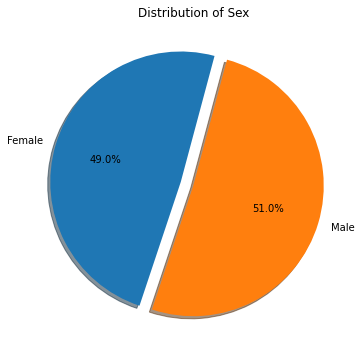

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_distribution = clean_data.groupby(["Sex"]).count()["Mouse ID"]
sex_distribution.name = ""
sex_distribution.plot.pie( 
    figsize=(10,6), 
    startangle=75, 
    autopct='%1.1f%%', 
    title="Distribution of Sex",
    explode=[0.1, 0],
    shadow=True,

)

sex_distribution

<Figure size 720x432 with 0 Axes>

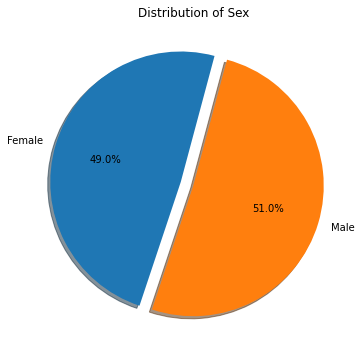

<Figure size 720x432 with 0 Axes>

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(10,6))
plt.pie(
    clean_data.groupby(["Sex"]).count()["Mouse ID"],
    labels=clean_data.groupby(["Sex"]).count().index,
    startangle=75, 
    autopct='%1.1f%%', 
#     title="Distribution of Sex",
    explode=[0.1, 0],
    shadow=True,

)

plt.title("Distribution of Sex")
plt.figure(figsize=(10,6))  # why figsize doesn't work

## Quartiles, Outliers and Boxplots

In [30]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = clean_data.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoints

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

### Using pandas to generate a box plot

In [42]:
lastpoint_data = pd.merge(clean_data, pd.DataFrame(last_timepoints), on=["Mouse ID", "Timepoint"])
lastpoint_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [ ]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
four_regimen = {}
for regimen in ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]:
    four_regimen[regimen] = lastpoint_data[lastpoint_data["Drug Regimen"] == regimen]["Tumor Volume (mm3)"].tolist()



Text(0.5, 1.0, 'Final Tumor Volume of Each Mouse across Four Regimens')

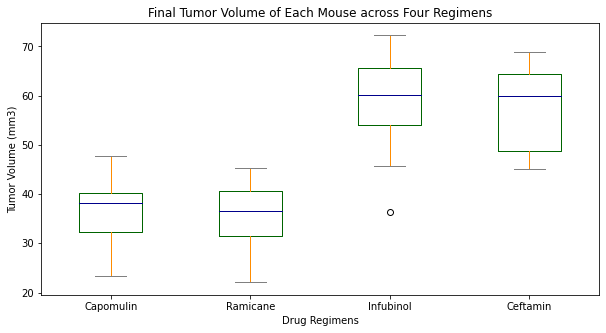

In [43]:
four_regimen = {}
for regimen in ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]:
    four_regimen[regimen] = lastpoint_data[lastpoint_data["Drug Regimen"] == regimen]["Tumor Volume (mm3)"].tolist()

color = {
    "boxes": "DarkGreen",
    "whiskers": "DarkOrange",
    "medians": "DarkBlue",
    "caps": "Gray",
}

pd.DataFrame(four_regimen).plot.box(figsize=(10,5), color=color)  
plt.xlabel("Drug Regimens")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Final Tumor Volume of Each Mouse across Four Regimens")




In [65]:
# Define a function to find outlier data
def check_outliers(data, lower, upper):
    """
    @param data: A list of data
    @param lower: lower bound of the data
    @param upper: upper bound of the data
    @return has_outliers: True if there are data below lower bound or above uppper bound
    @return count_below: The number of data below lower bound
    @return count_above: The number of data above upper bound
    """
    has_outlier = False
    count_below = 0
    count_above = 0
    for number in data:
        if number > upper:
            count_above += 1
        if number < lower: 
            count_below += 1
    
    if count_above >0 or count_below > 0:
        has_outlier = True
    
    return has_outlier, count_below, count_above
    
        

In [69]:
q_data = {}
for regimen in four_regimen:
    q_data[regimen] = {}
    df = pd.Series(four_regimen[regimen])
    quartiles = df.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq- lowerq
    median = quartiles[0.5]
    lower_bound = lowerq - 1.5 * iqr
    upper_bound = upperq + 1.5 * iqr
   
    q_data[regimen]["Lowerq"] = lowerq
    q_data[regimen]["Upperq"] = lowerq
    q_data[regimen]["IQR"] = lowerq
    q_data[regimen]["Median"] = median
    q_data[regimen]["Lower Bound"] = lower_bound
    q_data[regimen]["Upper Bound"] = upper_bound
    
    has_outlier_data, count_below, count_above = check_outliers(four_regimen[regimen], lower_bound, upper_bound)
    if has_outlier_data:
        q_data[regimen]["Outliers"] = f"Has outliers, {count_below} below and {count_above} above" 
    else:
        q_data[regimen]["Outliers"] = "No outliers"

pd.DataFrame(q_data).transpose()


,Lowerq,Upperq,IQR,Median,Lower Bound,Upper Bound,Outliers
Capomulin,32.377357,32.377357,32.377357,38.125164,20.704562,51.832015,No outliers
Ramicane,31.56047,31.56047,31.56047,36.561652,17.912664,54.306811,No outliers
Infubinol,54.048608,54.048608,54.048608,60.16518,36.832905,82.741446,"Has outliers, 1 below and 0 above"
Ceftamin,48.722078,48.722078,48.722078,59.851956,25.35545,87.666458,No outliers


### Using pyplot to generate a box plot

Text(0.5, 1.0, 'Final Tumor Volume of Each Mouse across Four Regimens')

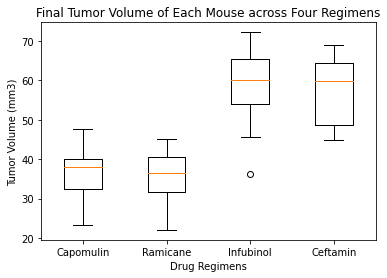

In [35]:
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
data = [lastpoint_data[lastpoint_data["Drug Regimen"] == regimen]["Tumor Volume (mm3)"] for regimen in regimens]
fig1, ax1 = plt.subplots()
ax1.boxplot(data)
ax1.set_xticklabels(regimens)
ax1.set_xlabel("Drug Regimens")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_title("Final Tumor Volume of Each Mouse across Four Regimens")

In [36]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 

    
    # Determine outliers using upper and lower bounds
    

In [37]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

Text(0.5, 1.0, 'Mouse s185 Tumor Volume vs. Time Point')

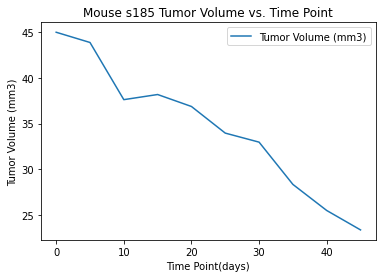

In [38]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
data = clean_data[clean_data["Drug Regimen"] == "Capomulin"][["Mouse ID","Tumor Volume (mm3)", "Timepoint"]]
mouse_s185_tumor_data = data[data["Mouse ID"] == "s185"][["Tumor Volume (mm3)", "Timepoint"]]
mouse_s185_tumor_data.set_index("Timepoint").plot()
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time Point(days)")
plt.title("Mouse s185 Tumor Volume vs. Time Point")


### Observation:
- For mouse s185, drug regimen Capomulin reduces tumor volume

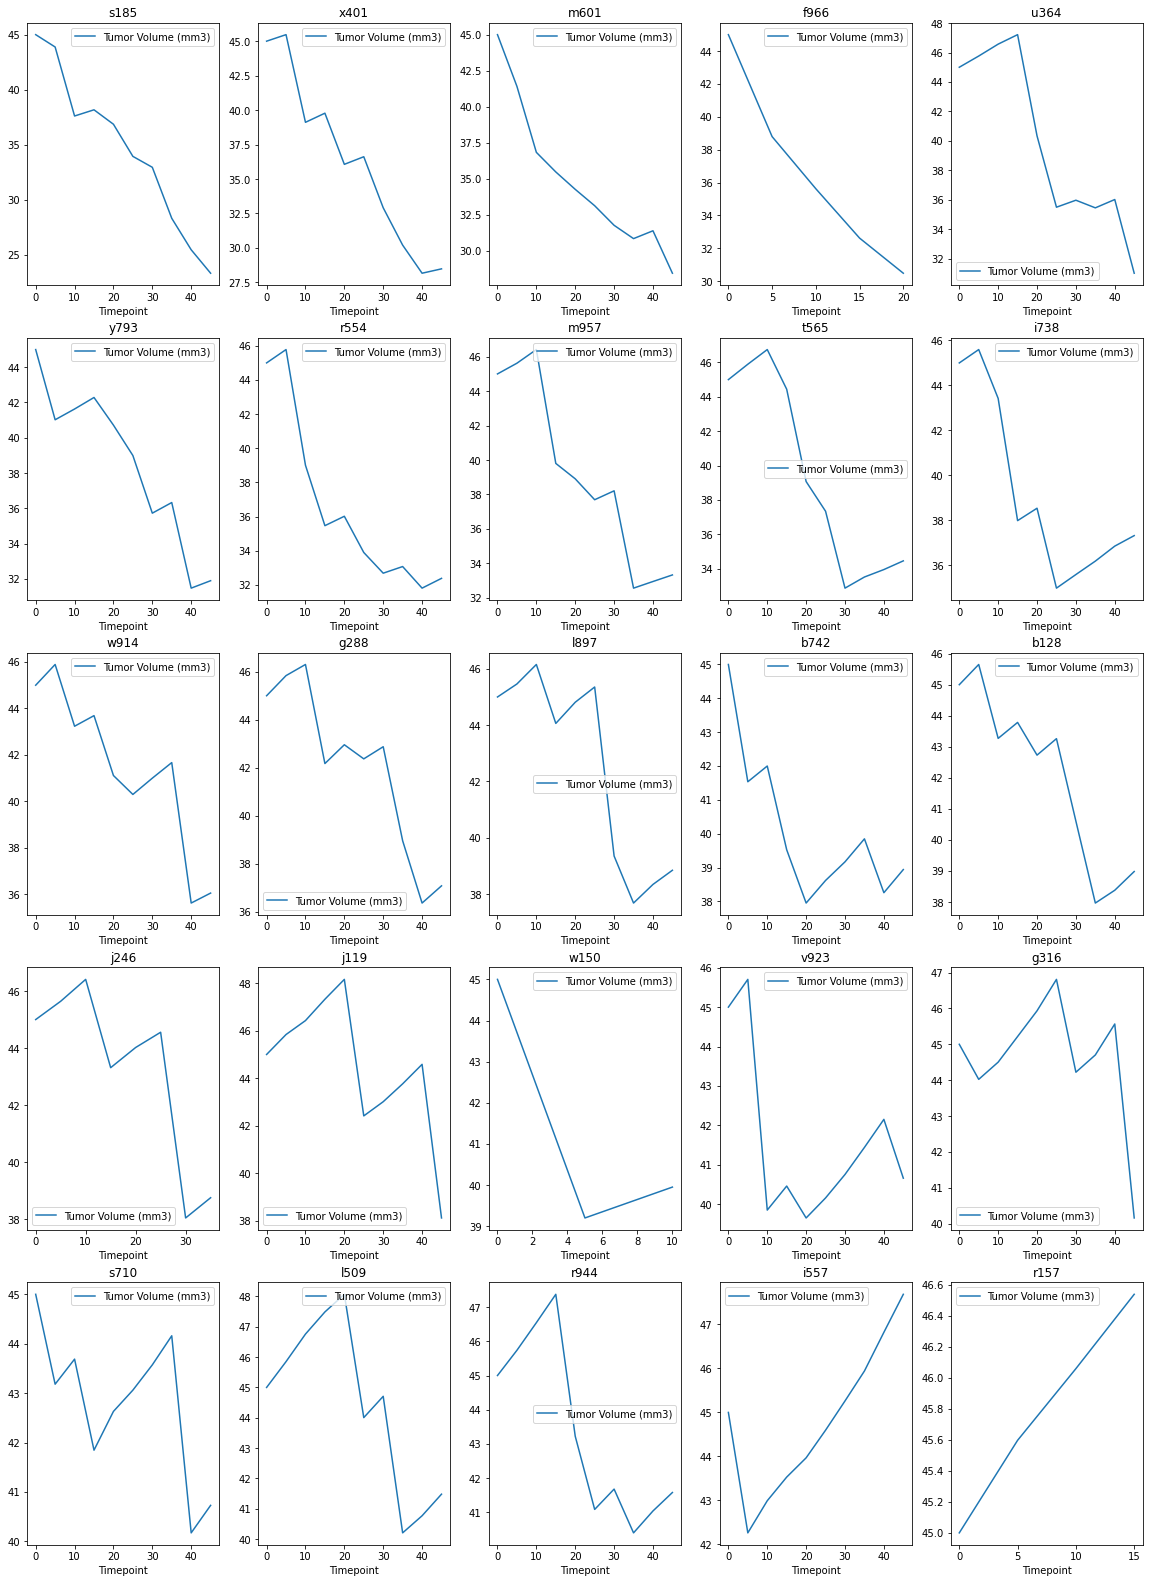

In [39]:


# Generate a line plot of tumor volume vs. time point for each mouse treated with Capomulin
fig, ax = plt.subplots(5, 5, figsize=(20,28))
i = 0
for each_mouse in data["Mouse ID"].unique():
    each_mouse_data = data[data["Mouse ID"] == each_mouse][["Tumor Volume (mm3)", "Timepoint"]]
    each_mouse_data.set_index("Timepoint").plot(ax=ax[i // 5][i % 5])
    ax[i // 5][i % 5].set_title(each_mouse)
    i += 1


### Observation:
- Drug regimen Capomulin has positive effect on tumor volume reduction for most mice

Text(0.5, 1.0, 'Average Tumor Volume vs. Mouse Weight for Capomulin Regimen')

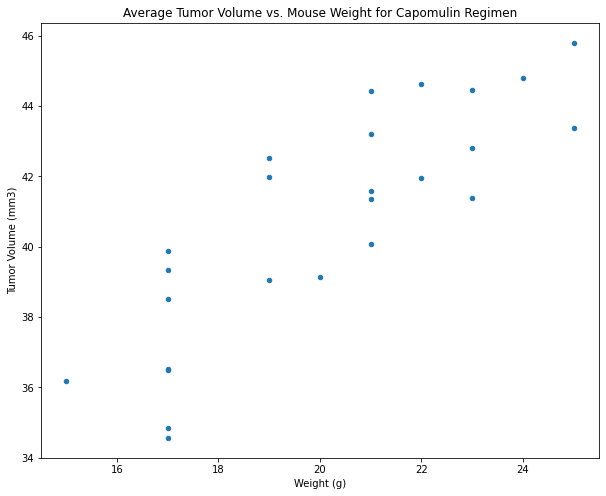

In [40]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]
tumor_weight = capomulin_data.groupby(["Mouse ID"]).mean()[["Weight (g)", "Tumor Volume (mm3)"]]
tumor_weight.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", figsize=(10,8))
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin Regimen")

### Observation
- Looks like average tumor volume and mouse weight has correlation
- The average tumor volume increases when mouse weight incereases

## Correlation and Regression

Value of r: 0.8419363424694718


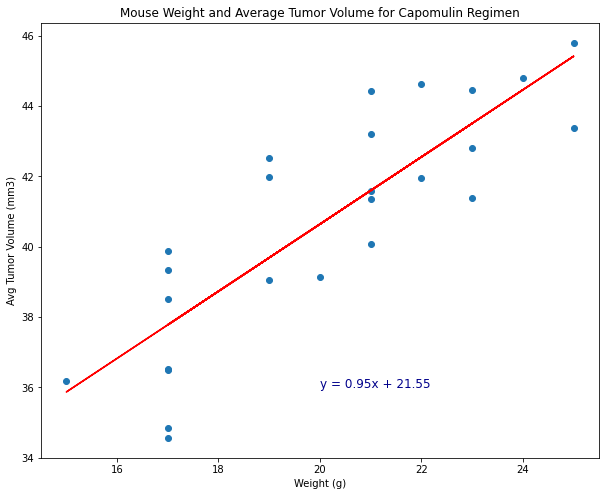

In [41]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x = tumor_weight["Weight (g)"]
y = tumor_weight["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (20,36), fontsize=12, color="darkblue")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.title("Mouse Weight and Average Tumor Volume for Capomulin Regimen")
print(f"Value of r: {rvalue}")

### Obersvation
- rvalue is 0.84, which is bigger than 0.7 
- Average tumor volume and Mouse Weight has strong correlation